### To get more API calls

Hello!  I'm a recent Physics grad from UC Berkeley whose very interested in Data Science.  I just want to become a more informed voter, learn some new Python tricks, and perhaps share my results freely with friends (I'd give you all credit for providing the data).  For fun I've been looking at Kaggle's US Census data, the analysis I do will probably be similar to what you see here (https://github.com/pstetz/Kaggle/tree/master/in_progress/census).  Also you can see my current work on the data you have provided me already here (https://github.com/pstetz/misc)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)

### Styling helpers

I found out about the color class from this [Stack Overflow question](https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python) (thanks [Boubakr](https://stackoverflow.com/users/1770999/boubakr)!)

In [2]:
### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

### Load data

In [3]:
elec = pd.read_csv("data/2018.csv")
elec = elec.drop(["Candidate:id", "request", "Candidate:token", 
           "Candidate_Entity:token", "Candidate_Entity:id", 
           "Election_Status:token", "Status_of_Candidate:token",
           "Status_of_Candidate:id", "Specific_Party:token", "Specific_Party:id",
           "Incumbency_Status:id", "General_Party:token", "General_Party:id", 
           "Election_Jurisdiction:token", "Election_Jurisdiction:id",
           "Election_Year:token", "Incumbency_Status:token", "Office_Sought:id",
           "Office_Sought:token", "Election_Type:id", "Election_Type:token", 
           "Candidate_Entity", "Election_Status:id", "Election_Year:id"], axis=1)


newsom = pd.read_csv("data/g_newsom.csv")
newsom = newsom.drop(['request', 'Original_Name:token', 'Original_Name:id',
                      'Contributor:token', 'Contributor:id', 'Type_of_Contributor:token', 
                      'Type_of_Contributor:id', 'Specific_Business:token', 
                      'Specific_Business:id', 'General_Industry:token',
                      'General_Industry:id','Broad_Sector:token', 'Broad_Sector:id',
                      'Amount:token', 'Amount:id', 'Date:token', 'Date:id',
                      'Last_Updated:token', 'Last_Updated:id', 'Type_of_Transaction:token',
                      'Type_of_Transaction:id', 'Purpose:token', 'Purpose:id', 
                      'City:token', 'City:id', 'State:token', 'State:id', 'Zip:token',
                      'Zip:id', 'In-State:token', 'In-State:id'
                     ], axis=1)

print(color.UNDERLINE, "The variables in Gavin Newsom's data are:", color.END)
print(newsom.columns)
print("\n*", "*".center(70, "-"), "*\n")
print(color.UNDERLINE, "The variables in the election data are:", color.END)
print(elec.columns)
print("\n*", "*".center(70, "-"), "*\n")
print("The shape of Gavin Newsom's data is: {}{}{}".format(color.BOLD, newsom.shape, color.END))
print("The shape of the election data is: {}{}{}".format(color.BOLD, elec.shape, color.END))

 The variables in Gavin Newsom's data are: 
Index(['Original_Name', 'Contributor', 'Type_of_Contributor',
       'Specific_Business', 'General_Industry', 'Broad_Sector', 'Amount',
       'Date', 'Last_Updated', 'Type_of_Transaction', 'Purpose', 'City',
       'State', 'Zip', 'In-State'],
      dtype='object')

* ----------------------------------*----------------------------------- *

 The variables in the election data are: 
Index(['Candidate', 'Election_Status', 'Status_of_Candidate', 'Specific_Party',
       'General_Party', 'Election_Jurisdiction', 'Election_Year',
       'Election_Type', 'Office_Sought', 'Incumbency_Status', '#_of_Records',
       'Total_$'],
      dtype='object')

* ----------------------------------*----------------------------------- *

The shape of Gavin Newsom's data is: (30657, 15)
The shape of the election data is: (89, 12)


### General contribtions

In [4]:
elec.sort_values("Total_$", ascending=False).head()

,Candidate,Election_Status,Status_of_Candidate,Specific_Party,General_Party,Election_Jurisdiction,Election_Year,Election_Type,Office_Sought,Incumbency_Status,#_of_Records,Total_$
0,"NEWSOM, GAVIN",Pending-Top Two Primary,Pending,DEMOCRATIC,Democratic,CA,2018,Standard,GOVERNOR,Open,26504,24886480.29
1,"CHIANG, JOHN",Pending-Top Two Primary,Pending,DEMOCRATIC,Democratic,CA,2018,Standard,GOVERNOR,Open,10017,12574986.45
2,"VILLARAIGOSA, ANTONIO",Pending-Top Two Primary,Pending,DEMOCRATIC,Democratic,CA,2018,Standard,GOVERNOR,Open,2295,9551687.61
3,"COX, JOHN H",Pending-Top Two Primary,Pending,REPUBLICAN,Republican,CA,2018,Standard,GOVERNOR,Open,3090,5115323.11
4,"BECERRA, XAVIER",Pending-Top Two Primary,Pending,DEMOCRATIC,Democratic,CA,2018,Standard,ATTORNEY GENERAL,Incumbent,5764,5027909.01


In [5]:
gov_N = len(elec[elec.Office_Sought == "GOVERNOR"]["Candidate"].unique())
print("The number of people running for govener is: {}{}{}".format(color.BOLD, gov_N, color.END))

The number of people running for govener is: 27


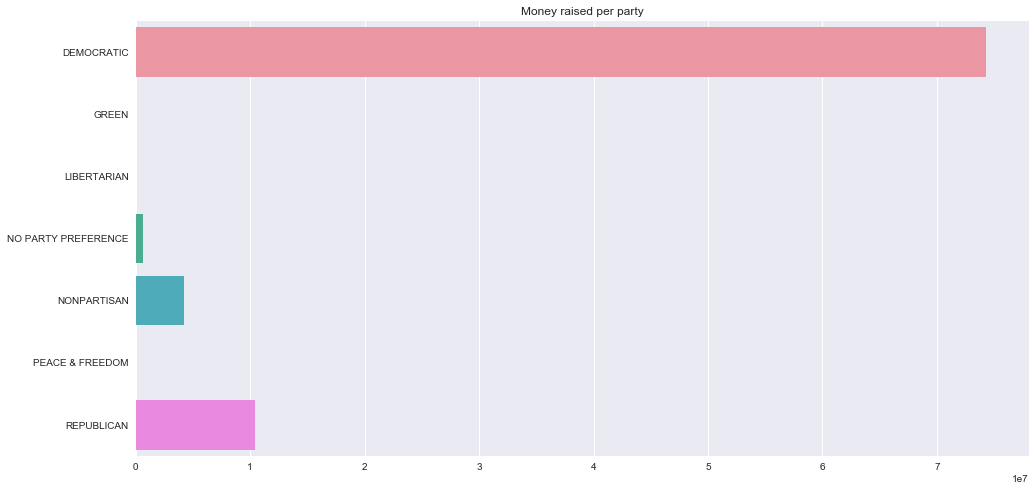

In [6]:
fig, axarr = plt.subplots(1, 1, figsize=(16, 8))

# data = elec.groupby("Office_Sought")["Total_$"].sum()
# sns.barplot(data.values, data.index, ax=axarr[0]).set(title="Money raised per office", ylabel="")

data = elec.groupby("Specific_Party")["Total_$"].sum()
_ = sns.barplot(data.values, data.index, ax=axarr).set(title="Money raised per party", ylabel="")

# Gavin Newsom

In [7]:
print("Gavin Newsom has raised ${}{}{} dollars".format(color.BOLD, int(newsom["Amount"].sum()), color.END))
newsom.sort_values("Amount", ascending=False).head()

Gavin Newsom has raised $33476583 dollars


,Original_Name,Contributor,Type_of_Contributor,Specific_Business,General_Industry,Broad_Sector,Amount,Date,Last_Updated,Type_of_Transaction,Purpose,City,State,Zip,In-State
0,UNITEMIZED CONTRIBUTIONS,UNITEMIZED DONATIONS,Other,Contributions under reporting threshold,Unitemized Contributions,Unitemized Contributions,409325.42,NaN,2017-11-14,UI,NaN,NaN,NaN,NaN,1
1,DEMOCRATIC STATE CENTRAL COMMITTEE OF CALIFORNIA,CALIFORNIA DEMOCRATIC PARTY,Non-Individual,Democratic Party committees,Party Committees,Party,335000.00,2010-10-28,2018-04-11,DIR,NaN,SACRAMENTO,CA,95811.0,1
2,DEMOCRATIC STATE CENTRAL COMMITTEE OF CALIFORNIA,CALIFORNIA DEMOCRATIC PARTY,Non-Individual,Democratic Party committees,Party Committees,Party,325000.00,2010-10-19,2018-04-11,DIR,NaN,SACRAMENTO,CA,95811.0,1
3,UNITEMIZED CONTRIBUTIONS,UNITEMIZED DONATIONS,Other,Contributions under reporting threshold,Unitemized Contributions,Unitemized Contributions,235789.82,NaN,2017-11-14,UI,NaN,NaN,NaN,NaN,1
4,UNITEMIZED CONTRIBUTIONS,UNITEMIZED DONATIONS,Other,Contributions under reporting threshold,Unitemized Contributions,Unitemized Contributions,204761.29,NaN,2018-03-16,UI,NaN,NaN,NaN,NaN,1


### Missing values

Notice the biggest missing value

In [8]:
missing_cols = [col for col in newsom.columns if any(newsom[col].isnull())]
print(newsom[missing_cols].isnull().sum())

Date         30
Purpose    9123
City         34
State        21
Zip          34
dtype: int64


### What does a purpose look like?

Woah there's a look of fundraisers

In [76]:
newsom[newsom.Purpose.notnull()]["Purpose"].value_counts()

INTERMEDIARY                                           21381
Fundraising Catering                                      28
Fundraising Event                                         24
Fundraising Event Expenses                                12
Fundraising event                                          6
Refund of Contribution                                     5
Beverages for Fundraising Event                            3
Data                                                       3
Wine for fundraiser                                        3
Mail production, postage, data & printing                  3
Printing services                                          3
Mail production & postage                                  3
Rental Fee                                                 2
Event Photography                                          2
Mail production, graphics & postage                        2
Fundraising Rental Fee                                     2
Online Ads              

### Is he getting reimbursed for catering or is this an expenditure (i.e. the amount should be negative)?

In [77]:
newsom[newsom["Purpose"] == "Fundraising Catering"]

,Original_Name,Contributor,Type_of_Contributor,Specific_Business,General_Industry,Broad_Sector,Amount,Date,Last_Updated,Type_of_Transaction,Purpose,City,State,Zip,In-State
1088,"COTCHETT, PITRE & MCCARTHY, LLP",COTCHETT PITRE & MCCARTHY,Non-Individual,Attorneys & law firms,Lawyers & Lobbyists,Lawyers & Lobbyists,6678.34,2018-04-04,2018-05-03,I,Fundraising Catering,BURLINGAME,CA,94010.0,1
1394,"KIMBALL, CARLA","KIMBALL, CARLA",Individual,Uncoded,Uncoded,Uncoded,6219.62,2017-06-22,2017-11-14,I,Fundraising Catering,MALIBU,CA,90265.0,1
1442,"ROSENBAUM, MARSHA","ROSENBAUM, MARSHA",Individual,Uncoded,Uncoded,Uncoded,5426.25,2018-01-23,2018-05-03,I,Fundraising Catering,SAN FRANCISCO,CA,94115.0,1
1815,PLUMPJACK GROUP,PLUMPJACK GROUP,Non-Individual,Uncoded,Uncoded,Uncoded,5000.00,2016-12-12,2017-11-14,I,Fundraising Catering,NAPA,CA,94558.0,1
2213,PORT THEATER,PORT THEATER,Non-Individual,Uncoded,Uncoded,Uncoded,4968.92,2017-06-30,2017-11-14,I,Fundraising Catering,NEWPORT BEACH,CA,92660.0,1
2228,"GLIDEWELL, JAMES R.","GLIDEWELL, JAMES R",Individual,Uncoded,Uncoded,Uncoded,4500.00,2017-06-30,2017-11-14,I,Fundraising Catering,NEWPORT BEACH,CA,92660.0,1
2232,"MCCRIGHT, VERONICA A.","MCCRIGHT, VERONICA A",Individual,Pharmaceutical manufacturing,Pharmaceuticals & Health Products,Health,4463.96,2017-06-25,2017-11-14,I,Fundraising Catering,OAKLAND,CA,94611.0,1
2267,"CHAI, DAVID","CHAI, DAVID",Individual,Uncoded,Uncoded,Uncoded,4100.00,2017-06-25,2017-11-14,I,Fundraising Catering,OAKLAND,CA,94611.0,1
2321,"ROBB, WALTER","ROBB, WALTER",Individual,Food stores,Food Processing & Sales,Agriculture,3650.00,2016-07-23,2017-11-14,I,Fundraising Catering,SAN RAFAEL,CA,94903.0,1
2364,"INTERNATIONAL CONFERENCES GROUP, LLC",INTERNATIONAL CONFERENCES GROUP LLC,Non-Individual,Uncoded,Uncoded,Uncoded,3350.00,2017-02-27,2017-11-14,I,Fundraising Catering,ASHLAND,OR,97520.0,0


### Anomalies

In [78]:
newsom[newsom["Amount"] < 0]

,Original_Name,Contributor,Type_of_Contributor,Specific_Business,General_Industry,Broad_Sector,Amount,Date,Last_Updated,Type_of_Transaction,Purpose,City,State,Zip,In-State
30548,"SILVER, PATRICIA","SILVER, PATRICIA",Individual,Uncoded,Uncoded,Uncoded,-5.00,2016-11-13,2017-11-14,DIR,INTERMEDIARY,LOS GATOS,CA,95030.0,1
30549,"ROCK, NANCY","ROCK, NANCY",Individual,Uncoded,Uncoded,Uncoded,-10.00,2015-12-31,2017-11-14,DIR,INTERMEDIARY,SAN FRANCISCO,CA,94110.0,1
30550,"ROBLES, TANIA","ROBLES, TANIA",Individual,Uncoded,Uncoded,Uncoded,-20.00,2015-11-08,2017-11-14,DIR,INTERMEDIARY,OAKLAND,CA,94607.0,1
30551,"CLEAVELAND, WILLIAM","CLEAVELAND, WILLIAM",Individual,Building operators & managers,Real Estate,"Finance, Insurance & Real Estate",-25.00,2015-11-15,2018-05-03,DIR,INTERMEDIARY,SAN FRANCISCO,CA,94134.0,1
30552,"CARRILLO, BEN","CARRILLO, BEN",Individual,Uncoded,Uncoded,Uncoded,-25.00,2016-05-07,2017-11-14,DIR,INTERMEDIARY,SANTA CLARITA,CA,91390.0,1
30553,"CARRILLO, BEN","CARRILLO, BEN",Individual,Uncoded,Uncoded,Uncoded,-25.00,2016-05-16,2017-11-14,DIR,INTERMEDIARY,SANTA CLARITA,CA,91390.0,1
30554,"MANDEL, ELIZABETH","MANDEL, ELIZABETH",Individual,Pharmaceutical manufacturing,Pharmaceuticals & Health Products,Health,-25.00,2016-03-31,2017-11-14,DIR,INTERMEDIARY,SAN FRANCISCO,CA,94108.0,1
30555,"SOFOS, RAE","SOFOS, RAE",Individual,Uncoded,Uncoded,Uncoded,-25.00,2017-08-15,2018-03-16,DIR,INTERMEDIARY,SAN MATEO,CA,94403.0,1
30556,"NUNEZ, OLGA","NUNEZ, OLGA",Individual,Uncoded,Uncoded,Uncoded,-25.00,2017-12-28,2018-03-16,DIR,INTERMEDIARY,WEST COVINA,CA,91792.0,1
30557,"FLEDDERUS, MARGREET","FLEDDERUS, MARGREET",Individual,Uncoded,Uncoded,Uncoded,-50.00,2017-07-20,2018-03-16,DIR,INTERMEDIARY,FORESTVILLE,CA,95436.0,1


### Contributions outside of California

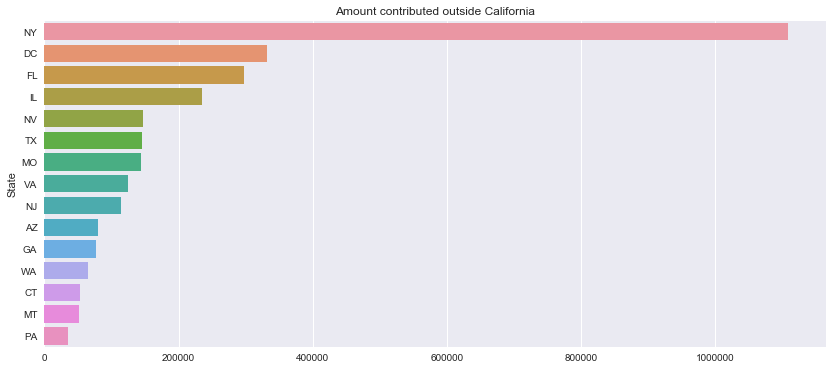

In [88]:
plt.figure(figsize=(14, 6))
data = newsom[newsom.State != "CA"].groupby("State")["Amount"].sum().sort_values(ascending=False).head(15)
_ = sns.barplot(data.values, data.index).set(title="Amount contributed outside California")

### What are DC contributions?

In [89]:
newsom[newsom.State == "DC"]

,Original_Name,Contributor,Type_of_Contributor,Specific_Business,General_Industry,Broad_Sector,Amount,Date,Last_Updated,Type_of_Transaction,Purpose,City,State,Zip,In-State
20,"REYES, JAMES V.","REYES, JAMES V",Individual,Food & kindred products manufacturing,Food Processing & Sales,Agriculture,29200.0,2017-06-30,2017-11-14,DIR,NaN,WASHINGTON,DC,20016.0,0
340,ENTERTAINMENT SOFTWARE ASSOCIATION,ENTERTAINMENT SOFTWARE ASSOCIATION,Non-Individual,Computer software,Computer Equipment & Services,Communications & Electronics,22000.0,2017-06-26,2017-11-14,DIR,NaN,WASHINGTON,DC,20001.0,0
488,"AMERICAN FEDERATION OF STATE, COUNTY & MUNICIP...",AMERICAN FEDERATION OF STATE COUNTY & MUNICIPA...,Non-Individual,State & local government employee unions,Public Sector Unions,Labor,13600.0,2014-09-15,2018-04-11,DIR,NaN,WASHINGTON,DC,20036.0,0
506,AMERICAN FEDERATION OF STATE COUNTY & MUNICIPA...,AMERICAN FEDERATION OF STATE COUNTY & MUNICIPA...,Non-Individual,State & local government employee unions,Public Sector Unions,Labor,12900.0,2010-06-24,2018-04-11,DIR,NaN,WASHINGTON,DC,20036.0,0
592,"VIDEO GAME IMPACT, INC. AN ENTERTAINMENT SOFTW...",VIDEO GAME IMPACT INC / ENTERTAINMENT SOFTWARE...,Non-Individual,Computer software,Computer Equipment & Services,Communications & Electronics,10000.0,2015-06-30,2017-11-14,DIR,NaN,WASHINGTON,DC,20004.0,0
601,"VIDEO GAME IMPACT, INC. AN ENTERTAINMENT SOFTW...",VIDEO GAME IMPACT INC / ENTERTAINMENT SOFTWARE...,Non-Individual,Computer software,Computer Equipment & Services,Communications & Electronics,10000.0,2015-12-16,2017-11-14,DIR,NaN,WASHINGTON,DC,20004.0,0
604,"SURES, JONATHAN JASON","SURES, JONATHAN JASON",Individual,Uncoded,Uncoded,Uncoded,10000.0,2015-12-23,2017-11-14,DIR,NaN,WASHINGTON,DC,20002.0,0
615,"CITIGROUP, INC. PAC - STATE (CITI PAC - STATE)",CITIGROUP,Non-Individual,"Finance, insurance & real estate","Miscellaneous Finance, Insurance & Real Estate","Finance, Insurance & Real Estate",10000.0,2015-12-08,2017-12-13,DIR,NaN,WASHINGTON,DC,20004.0,0
656,"SURES, JONATHAN JASON","SURES, JONATHAN JASON",Individual,Uncoded,Uncoded,Uncoded,10000.0,2016-12-20,2017-11-14,DIR,NaN,WASHINGTON,DC,20002.0,0
885,ENTERTAINMENT SOFTWARE ASSOCIATION,ENTERTAINMENT SOFTWARE ASSOCIATION,Non-Individual,Computer software,Computer Equipment & Services,Communications & Electronics,8200.0,2016-04-29,2017-11-14,DIR,NaN,WASHINGTON,DC,20004.0,0


### Different contributers to Gavin Newsom

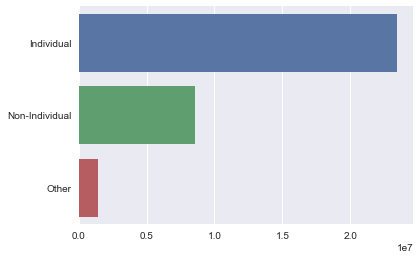

In [41]:
data = newsom.groupby("Type_of_Contributor")["Amount"].sum()
_ = sns.barplot(data.values, data.index).set(ylabel="")

In [ ]:
# print("Number of not null rows: {}{}{}".format(color.BOLD, len(newsom[newsom.Amount.notnull()]), color.END))
# print("Number of null rows: {}{}{}".format(color.BOLD, len(newsom[newsom.Amount.isnull()]), color.END))